In [1]:
# ! pip install pytorch

In [2]:
# !pip install split-folders matplotlib opencv-python spicy

In [3]:
# Import Keras modules and its important APIs
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
# from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os
import torch
import torch.nn as nn
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


In [4]:
train_path="archive - Copy/Indian-monuments/images/train"

In [5]:
# splitfolders.ratio(train_path, output="archive - Copy/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)


In [6]:
dicti_values={0:'Ajanta Caves',
 1:'Charar E Sharif',
 2:'Chhota Imambara',
 3:'Ellora Caves',
 4:'Fatehpur Sikri',
 5:'Gateway of India',
 6:'Humayun_s Tomb',
 7:'India gate pics',
 8:'Khajuraho',
 9:'Sun Temple Konark',
 10:'alai darwaza',
 11:'alai minar',
 12:'basilica of bom jesus',
 13:'charminar',
 14:'golden temple',
 15:'hawa mahal pics',
 16:'iron pillar',
 17:'jamali kamali_tomb',
 18:'lotus temple',
 19:'mysore palace',
 20:'qutub minar',
 21:'tajmahal',
 22:'tanjavur temple',
 23:'victoria memorial'}
l=[]
for i in range(23):
    l.append(dicti_values[i])
class_names=l
print(class_names)

['Ajanta Caves', 'Charar E Sharif', 'Chhota Imambara', 'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India', 'Humayun_s Tomb', 'India gate pics', 'Khajuraho', 'Sun Temple Konark', 'alai darwaza', 'alai minar', 'basilica of bom jesus', 'charminar', 'golden temple', 'hawa mahal pics', 'iron pillar', 'jamali kamali_tomb', 'lotus temple', 'mysore palace', 'qutub minar', 'tajmahal', 'tanjavur temple']


In [7]:
datagen = ImageDataGenerator()

In [8]:
train_generator = datagen.flow_from_directory( 
    directory="archive - Copy/data-split/train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)
valid_generator = datagen.flow_from_directory( 
    directory="archive - Copy/data-split/val", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

# test data
test_generator = datagen.flow_from_directory( 
    directory="archive - Copy\data-split/test", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 2935 images belonging to 23 classes.


<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
C:\Users\91995\AppData\Local\Temp\ipykernel_8584\1830802308.py:18: SyntaxWarning: invalid escape sequence '\d'
  directory="archive - Copy\data-split/test",


Found 836 images belonging to 23 classes.


Found 433 images belonging to 23 classes.


In [9]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [10]:
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(24, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [11]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

model_history = trainModel(model = model, epochs = 120, optimizer = "Adam")

In [13]:
batch_size = 32
epochs = 120
optimizer = "Adam"
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history=model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

Epoch 1/120


c:\Users\91995\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 700s 7s/step - accuracy: 0.0610 - loss: 3.5991 - val_accuracy: 0.2141 - val_loss: 2.8514
Epoch 2/120
92/92 ━━━━━━━━━━━━━━━━━━━━ 671s 7s/step - accuracy: 0.1161 - loss: 2.8063 - val_accuracy: 0.3732 - val_loss: 2.3519
Epoch 3/120
92/92 ━━━━━━━━━━━━━━━━━━━━ 625s 7s/step - accuracy: 0.1705 - loss: 2.4615 - val_accuracy: 0.4342 - val_loss: 1.8366
Epoch 4/120
92/92 ━━━━━━━━━━━━━━━━━━━━ 624s 7s/step - accuracy: 0.2854 - loss: 2.0876 - val_accuracy: 0.5060 - val_loss: 1.4804
Epoch 5/120
92/92 ━━━━━━━━━━━━━━━━━━━━ 608s 7s/step - accuracy: 0.3604 - loss: 1.8444 - val_accuracy: 0.6232 - val_loss: 1.2676
Epoch 6/120
92/92 ━━━━━━━━━━━━━━━━━━━━ 647s 7s/step - accuracy: 0.4185 - loss: 1.6412 - val_accuracy: 0.5658 - val_loss: 1.1085
Epoch 7/120
92/92 ━━━━━━━━━━━━━━━━━━━━ 656s 7s/step - accuracy: 0.4720 - loss: 1.4383 - val_accuracy: 0.5634 - val_loss: 1.0142
Epoch 8/120
92/92 ━━━━━━━━━━━━━━━━━━━━ 591s 6s/step - accuracy: 0.5216 - loss: 1.3231 - val_accuracy: 0.6041 - val_l

In [14]:
model.save('resnet_model61.h5')

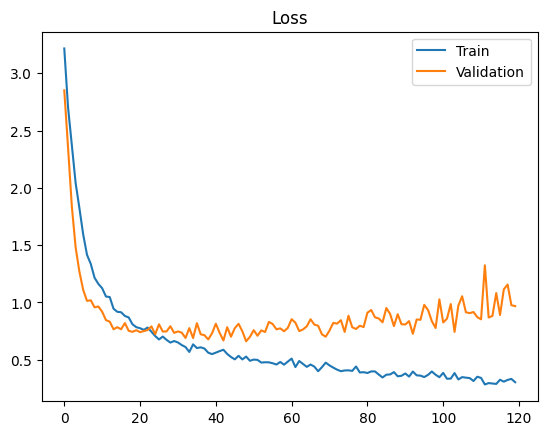

In [15]:
loss_train_curve = history.history["loss"]
loss_val_curve = history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

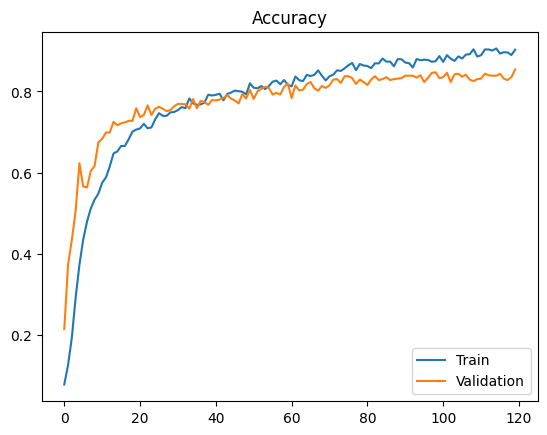

In [17]:
acc_train_curve = history.history["accuracy"]
acc_val_curve = history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [19]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

14/14 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.8917 - loss: 0.4755
The test loss is:  0.571118950843811
The best accuracy is:  87.52886652946472


In [18]:
model.save('resnet_model71.h5')